# Plot AT2017gfo runs

Abstract: This is to plot and compare different runs on the AT2017gfo dataset.

First of all, this is to check if we can reproduce the run that is in Peter's directory.

After that, we can use the same script to plot other runs:
- Bu2023 test run
- flax Bu2022 run

Note: Peter's run is at: `/home/enlil/ppang/Projects/AT2017gfo_chemical_tf/inference/inference/Bu2022Ye_uniform_iota/outdir/`

Imports

In [62]:
import numpy as np 
import matplotlib.pyplot as plt
import json
import corner 
import copy
from nmma.em.io import loadEvent
from nmma.em.model import SVDLightCurveModel
from nmma.em.utils import calc_lc, getFilteredMag

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

# Improved corner kwargs


default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False,
                        density=True,
                        linewidth=2)

# parameter_names = ['inclination_EM', 'log10_mej_dyn', 'vej_dyn', 'Yedyn', 'log10_mej_wind', 'vej_wind', 'timeshift', 'luminosity_distance', 'Ebv']
parameter_names_bu2022 = ['log10_mej_dyn', 'vej_dyn', 'log10_mej_wind', 'vej_wind', 'Yedyn', 'inclination_EM']
parameter_names_bu2023 = ['log10_mej_dyn', 'vej_dyn', 'log10_mej_wind', 'vej_wind', 'Yedyn', 'Yewind', 'inclination_EM']

labels_bu2022 = ['$\\log_{10}M^{\\rm{dyn}}_{\\rm{ej}}$', '$V^{\\rm{dyn}}_{\\rm{ej}}$', '$\\log_{10}M^{\\rm{wind}}_{\\rm{ej}}$', '$V^{\\rm{wind}}_{\\rm{ej}}$', '$Y_{\\rm{e, dyn}}$', '$\\iota$']
labels_bu2023 = ['$\\log_{10}M^{\\rm{dyn}}_{\\rm{ej}}$', '$V^{\\rm{dyn}}_{\\rm{ej}}$', '$\\log_{10}M^{\\rm{wind}}_{\\rm{ej}}$', '$V^{\\rm{wind}}_{\\rm{ej}}$', '$Y_{\\rm{e, dyn}}$', '$Y_{\\rm{e, wind}}$', '$\\iota$']

colors = ["blue", "red", "green", "purple", "cyan", "magenta", "gold", "yellow",]

## Utilities

In [63]:
def get_posterior_from_filename(results_filename,
                                return_likelihood = False):
    with open(results_filename, "r") as f:
        results = json.load(f)
    posterior = results["posterior"]["content"]

    if return_likelihood:
        log_likelihood = posterior['log_likelihood']    

        return posterior, log_likelihood
    else:
        return posterior
    
def get_samples(posterior,
                parameter_names = parameter_names_bu2022):
    posterior_dict = {}
    for param in parameter_names:
        posterior_dict[param] = posterior[param]
    posterior_samples = np.array([posterior_dict[param] for param in parameter_names]).T
    
    return posterior_samples

def get_evidence(path):
    with open(path, "r") as f:
        results = json.load(f)
        ln_evidence = results["log_evidence"]
    return ln_evidence

def get_ml_params(path, parameter_names = parameter_names_bu2022):
    posterior, log_likelihood = get_posterior_from_filename(path, return_likelihood=True)
    posterior_samples = get_samples(posterior, parameter_names=parameter_names)
    max_likelihood_idx = np.argmax(log_likelihood)
    ml_params = posterior_samples[max_likelihood_idx]
    
    return ml_params

Locations of runs:

- "/home/urash/twouters/KN-inference-GPU/Bu2022_test_run/runs/outdir/AT2017gfo_original_result.json": reproduces Peter's run
- "/home/urash/twouters/KN-inference-GPU/Bu2022_test_run/runs/outdir/AT2017gfo_corrected_result.json": same as above, but use the data corrected for extinction

## Choose runs to plot

In [64]:
outdir_bu2022 = "/home/urash/twouters/KN-inference-GPU/Bu2022_test_run/runs/outdir/"
outdir_bu2023 = "/home/urash/twouters/KN-inference-GPU/Bu2023_test_run/runs/outdir/"
filenames_dict = {
    "Bu2022": f"{outdir_bu2022}AT2017gfo_corrected_result.json",
    "Bu2023": f"{outdir_bu2023}AT2017gfo_corrected_result.json",
    "Bu2023 (dL 40)": f"{outdir_bu2023}AT2017gfo_dL40_result.json",
    "Bu2023 (dL 40, tight iota)": f"{outdir_bu2023}AT2017gfo_dL40_tight_iota_result.json",
    } # "Bu2023 (dL 44, tight iota)": f"{outdir_bu2023}AT2017gfo_dL44_tight_iota_result.json",

## Comparison corner plots

Bu2022Ye plots

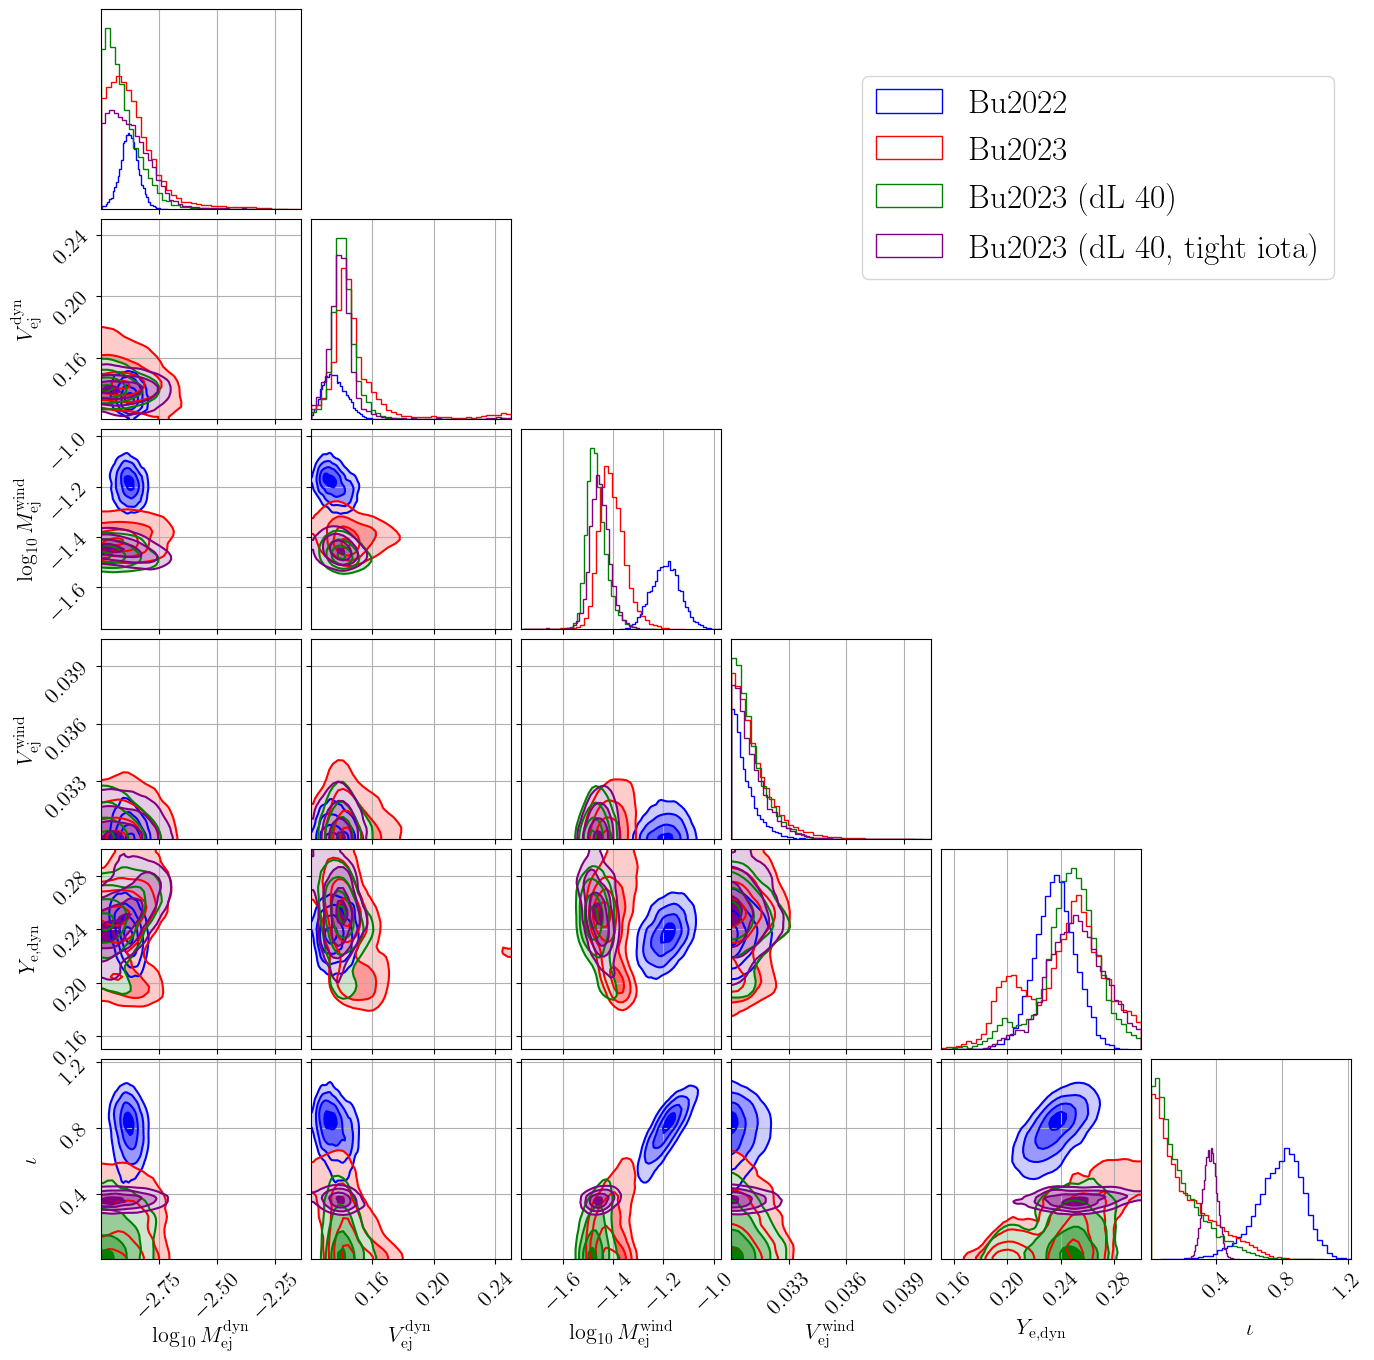

In [65]:
plot_labels = list(filenames_dict.keys())
# Load data
posterior_samples_dict = {}
posterior_dict = {}

for name, filepath in filenames_dict.items():
    posterior = get_posterior_from_filename(filepath)
    posterior_dict[name] = posterior
    posterior_samples_dict[name] = get_samples(posterior)
    
# Plot data
for i, name in enumerate(posterior_samples_dict.keys()):
    posterior_samples = posterior_samples_dict[name]
    default_corner_kwargs["color"] = colors[i]
    if i == 0:
        fig = corner.corner(posterior_samples, labels=labels_bu2022, **default_corner_kwargs)
    else:
        corner.corner(posterior_samples, fig=fig, labels=labels_bu2022, **default_corner_kwargs)

# Make a legend
plt.legend(plot_labels, fontsize=24, bbox_to_anchor=(1, 6))
plt.show()

Bu2023 plots:

Bu2023
Bu2023 (dL 40)
Bu2023 (dL 40, tight iota)


<Figure size 2000x2000 with 0 Axes>

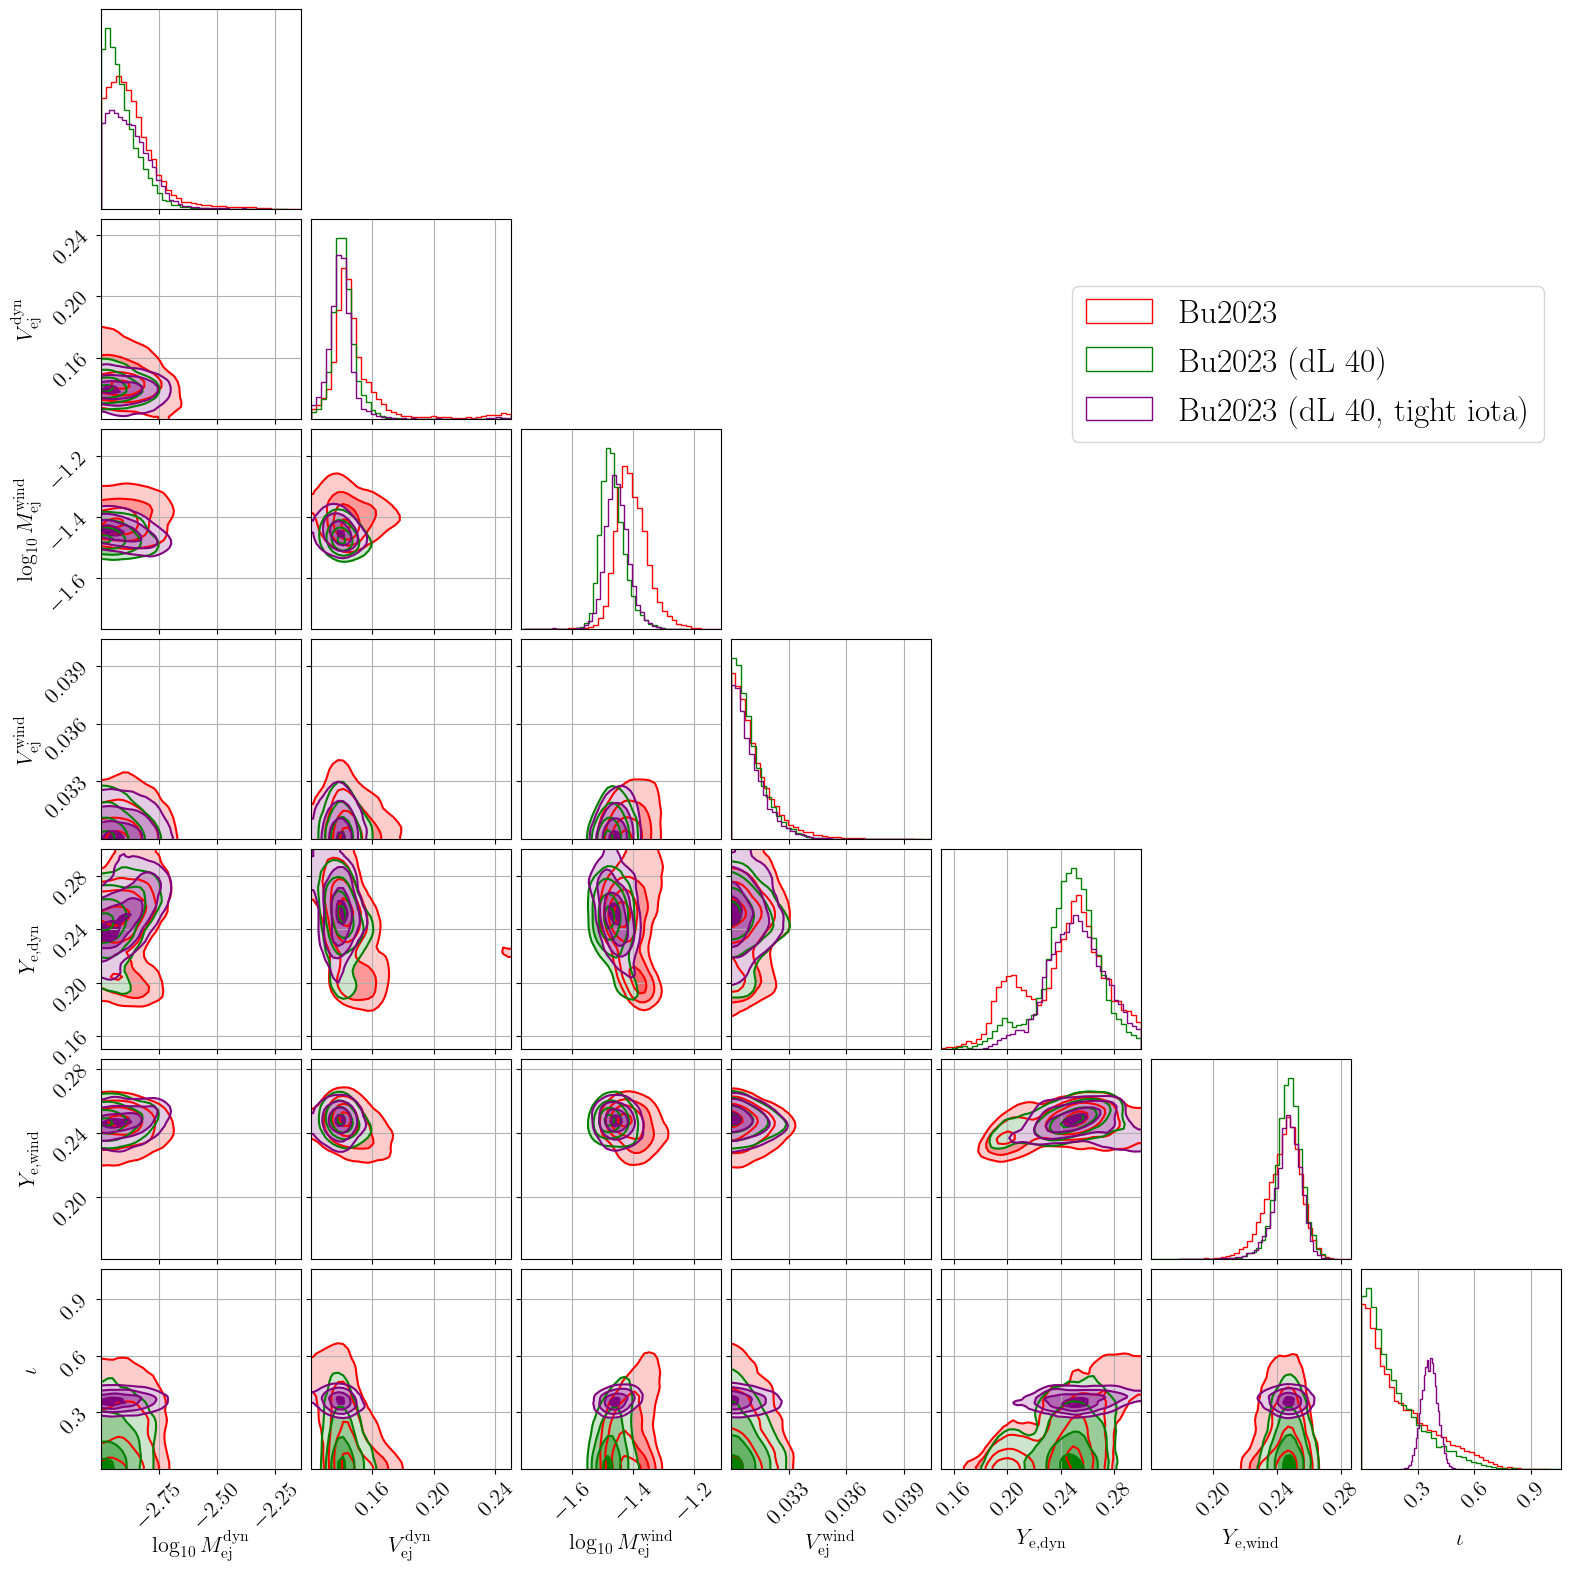

In [66]:
plt.figure(figsize=(20, 20))
counter = 0
for i, name in enumerate(posterior_dict.keys()):
    if "Bu2023" not in name:
        continue
    print(name)
    posterior_samples = get_samples(posterior_dict[name], parameter_names=parameter_names_bu2023)
    default_corner_kwargs["color"] = colors[i]
    if counter == 0:
        fig = corner.corner(posterior_samples, labels=labels_bu2023, **default_corner_kwargs)
    else:
        corner.corner(posterior_samples, fig=fig, labels=labels_bu2023, **default_corner_kwargs)
    counter += 1

# Make a legend
new_plot_labels = [label for label in plot_labels if "Bu2023" in label]
plt.legend(new_plot_labels, fontsize=24, bbox_to_anchor=(1, 6))
plt.show()

## Get Bayes factor

In [67]:
nb_round = 2
evidence_dict = {}
for name, filepath in filenames_dict.items():
    evidence_dict[name] = get_evidence(filepath)
    
print(evidence_dict)
    
# Now get the Bayes factors
names = np.array(list(evidence_dict.keys()))
ln_Z = np.array(list(evidence_dict.values()))

sort_idx = np.argsort(ln_Z)[::-1]
ln_Z_sorted = ln_Z[sort_idx]
names_sorted = names[sort_idx]
ln_Z_sorted

print(f"Best fit: {names_sorted[0]}\n")
print(f"Bayes factors:\n")
for i, name in enumerate(names_sorted):
    if i == 0:
        continue
    
    ln_B = np.round(ln_Z_sorted[0] - ln_Z_sorted[i], nb_round)
    print(f"{name}: {ln_B}")

{'Bu2022': -158.29306488418692, 'Bu2023': -149.37281211868236, 'Bu2023 (dL 40)': -150.2560995967021, 'Bu2023 (dL 40, tight iota)': -150.06257919422887}
Best fit: Bu2023

Bayes factors:

Bu2023 (dL 40, tight iota): 0.69
Bu2023 (dL 40): 0.88
Bu2022: 8.92


## Get maximum likelihood params

In [68]:
ml_params_dict = {}
for name, filepath in filenames_dict.items():
    which_params = parameter_names_bu2022 if "Bu2022" in name else parameter_names_bu2023
    ml_params_dict[name] = get_ml_params(filepath, which_params)
print(ml_params_dict)

{'Bu2022': array([-2.85865872,  0.1336517 , -1.15794996,  0.03005188,  0.23700145,
        0.8743161 ]), 'Bu2023': array([-2.93919393,  0.14393768, -1.44335374,  0.0300382 ,  0.25653695,
        0.25196089,  0.01993937]), 'Bu2023 (dL 40)': array([-2.92942668,  0.13816943, -1.48359338,  0.03009811,  0.26593839,
        0.25190324,  0.02594538]), 'Bu2023 (dL 40, tight iota)': array([-2.82676706,  0.13841515, -1.47300103,  0.03032591,  0.26214109,
        0.2515992 ,  0.29914269])}


## Load the data

In [69]:
data_file = "/home/urash/twouters/KN-inference-GPU/Bu2023_test_run/data/AT2017gfo_corrected.dat"
trigger_time = 57982.5285236896
tmin, tmax = 0.05, 14
data = loadEvent(data_file)
filters = list(data.keys())
sample_times = np.linspace(tmin, tmax, 1000)

## TODO debug this -- get lightcurves

In [70]:
svd_path = "/home/urash/twouters/nmma_models"

print("Loading Bu2022Ye model")
lc_model_bu2022 = SVDLightCurveModel(
        "Bu2022Ye",
        sample_times,
        svd_path=svd_path,
        parameter_conversion=None,
        mag_ncoeff=10,
        lbol_ncoeff=None,
        interpolation_type="tensorflow",
        model_parameters=None,
        filters=filters,
        local_only=True
)

print("Loading Bu2023Ye model")
lc_model_bu2023 = SVDLightCurveModel(
        "Bu2023Ye",
        sample_times,
        svd_path=svd_path,
        parameter_conversion=None,
        mag_ncoeff=10,
        lbol_ncoeff=None,
        interpolation_type="tensorflow",
        model_parameters=None,
        filters=filters,
        local_only=True
)

Loading Bu2022Ye model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter ps1__y
Loaded filter 2massj
Loaded filter 2massh
Loaded filter 2massks
Loaded filter sdssu
Loading Bu2023Ye model
Loaded filter ps1__g
Loaded filter ps1__r
Loaded filter ps1__i
Loaded filter ps1__z
Loaded filter ps1__y
Loaded filter 2massj
Loaded filter 2massh
Loaded filter 2massks
Loaded filter sdssu


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


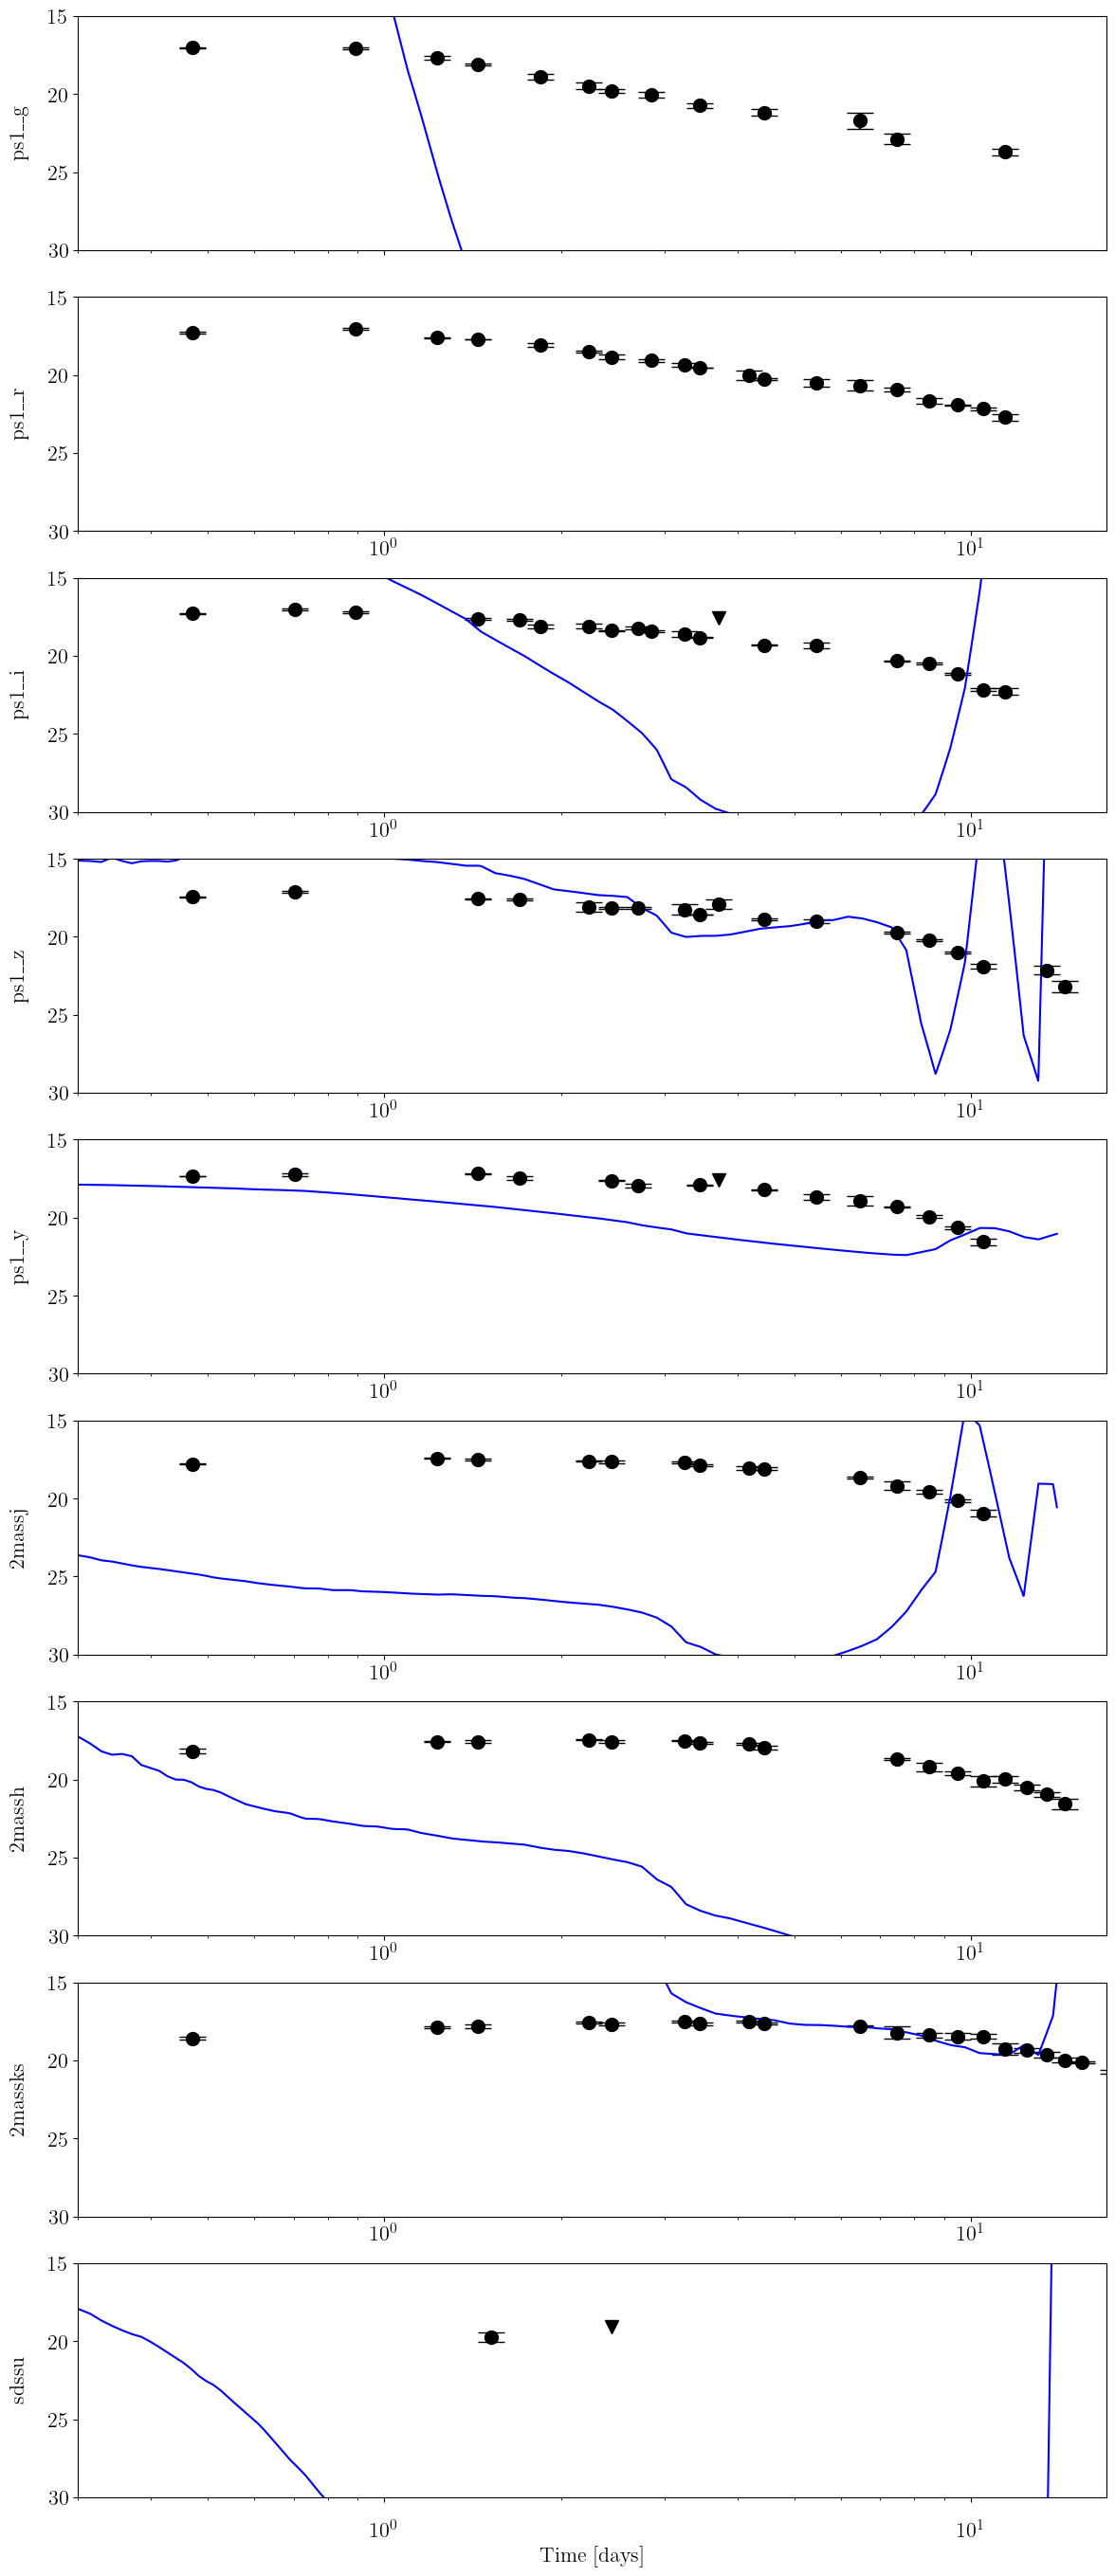

In [71]:
### Plot hyperparameters
set_ylim = True
set_yticks = True
show_legend = False
show_data = True
luminosity_distance = 44.0

error_budget = '1.0'
error_budget = [float(x) for x in error_budget.split(",")]
error_budget = dict(zip(filters, error_budget * len(filters)))
xlim = f"{tmin},{tmax}"
ylim = "32, 15"
x_left = 3e-1
x_right = tmax + 3

# colors = cm.Spectral(np.linspace(0, 1, len(filters)))[::-1]

plt.figure(figsize=(14, 34))

cnt = 0
for filt in filters:
    cnt = cnt + 1
    if cnt == 1:
        ax1 = plt.subplot(len(filters), 1, cnt)
    elif cnt == 2 or cnt == 3:
        ax2 = plt.subplot(len(filters), 1, cnt, sharex=ax1)
    else:
        ax2 = plt.subplot(len(filters), 1, cnt, sharex=ax1)

    samples = data[filt]
    t, y, sigma_y = copy.deepcopy(samples[:, 0]), copy.deepcopy(samples[:, 1]), copy.deepcopy(samples[:, 2])
    t -= trigger_time   
    idx = np.where(~np.isnan(y))[0]
    t, y, sigma_y = t[idx], y[idx], sigma_y[idx]

    # 1) plot data points
    idx = np.where(np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx], y[idx], sigma_y[idx], fmt="o", color='k', markersize=10, capsize=10)
    # plot upper bounds
    idx = np.where(~np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx], y[idx], sigma_y[idx], fmt="v", color='k', markersize=10, capsize=10)
    
    # 2) Plot the models
    
    
    ## 2.1) Bu2022
    # _, _, mag_abs = calc_lc(sample_times, ml_params_dict["Bu2022"], svd_mag_model=lc_model_bu2022.svd_mag_model, svd_lbol_model=None, mag_ncoeff=10, lbol_ncoeff=None, filters=filters, interpolation_type="tensorflow")
    
    # mag_abs_filt = getFilteredMag(mag_abs, filt)
    # mag_app_filt = mag_abs_filt + 5.0 * np.log10(luminosity_distance * 1e6 / 10.0)
    
    
    ## 2.2) Bu2023
    _, _, mag_abs = calc_lc(sample_times, ml_params_dict["Bu2023"], svd_mag_model=lc_model_bu2023.svd_mag_model, svd_lbol_model=None, mag_ncoeff=10, lbol_ncoeff=None, filters=filters, interpolation_type="tensorflow")
    
    mag_abs_filt = getFilteredMag(mag_abs, filt)
    mag_app_filt = mag_abs_filt + 5.0 * np.log10(luminosity_distance * 1e6 / 10.0)
    
    plt.plot(sample_times, mag_app_filt, color="blue")

    #plt.ylim([float(x) for x in ylim.split(",")])
    plt.xlim([float(x) for x in xlim.split(",")])
    plt.xscale('log')
    plt.grid()
    
    filt_label = filt
    
    if cnt == 1:
        
        plt.ylabel(filt_label, rotation=90, labelpad=15)
        if set_ylim:
            ax1.set_ylim([30,15])
        #plt.ylim([float(x) for x in ylim.split(",")])
    else:
        # filt_label = filt.replace("__", "-")
        plt.ylabel(filt_label, rotation=90, labelpad=15)
        if set_ylim:
            ax2.set_ylim([30,15])
        #plt.ylim([float(x) for x in ylim.split(",")])

    if cnt == 1:
        if set_yticks:
            ax1.set_yticks([30, 25, 20, 15])
        else:
            ax1.invert_yaxis()
        ax1.set_xlim(left=x_left, right=x_right)
        plt.setp(ax1.get_xticklabels(), visible=False)
        legend = plt.legend(loc = "center", bbox_to_anchor=(0.5, 1.2), shadow=False,
                            fancybox=True, ncol=4)
        legend.get_frame().set_alpha(None)
    else:
        if set_yticks:
            ax2.set_yticks([30, 25, 20, 15])
        else:
            ax2.invert_yaxis()
        ax2.set_xlim(left=x_left, right=x_right)
    

ax1.set_zorder(1)
plt.xlabel("Time [days]")
ax2.tick_params(axis='x', which='major', pad=15)
#plt.legend(bbox_to_anchor=(0., 12.9, 1.025, .0), ncol=2, fontsize=40, frameon=True)
#plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0)

if not show_legend:
    legend.remove()

if show_data:
    plt.show()
else:
    plt.close()